In [2]:
#Gradient Boosting

import numpy as np
import matplotlib.pyplot as plt
from preamble import *
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)



In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [4]:
from sklearn.model_selection import cross_val_score

cvscores = cross_val_score(gbrt, X_test, y_test, cv=10)
print("테스트 세트 정확도 cv = 10: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt,  X_test, y_test, cv=5)
print("테스트 세트 정확도 cv = 5: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도 cv = 10: 0.931

테스트 세트 정확도 cv = 5: 0.937



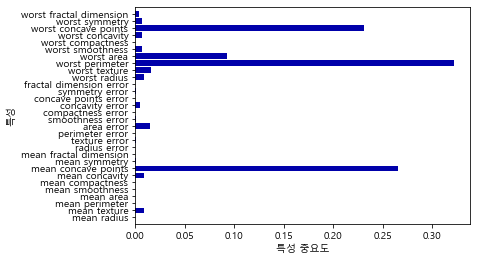

In [5]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(gbrt)

#일부 특성을 무시하고 있는 것을 알 수 있다.

In [6]:
#앙상블
#데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 보팅 클래스: 랜덤포레슽, 로지스틱회귀, 결정트리

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [7]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth =3, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),('dt',dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [8]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
    
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),('dt',dt_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))


#부팅을 이용해서 앙상블 효과를 내는 방법

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904
LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [9]:

#xgboost 임포트
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

#make_moon 데이터 분류 결과 : 0.872

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

In [10]:
#SVM 
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc =SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [11]:
print(X_train)

# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별(최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최소값을 빼고 범위로 나누면
#각 특성에 대해 최솟값은 0 최댓값은 1
X_train_scaled = (X_train- min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training)/ range_on_training

[[ 11.85   17.46   75.54  ...   0.091   0.31    0.07 ]
 [ 11.22   19.86   71.94  ...   0.02    0.329   0.065]
 [ 20.13   28.25  131.2   ...   0.163   0.257   0.066]
 ...
 [  9.436  18.32   59.82  ...   0.051   0.245   0.081]
 [  9.72   18.22   60.73  ...   0.      0.191   0.066]
 [ 11.51   23.93   74.52  ...   0.097   0.211   0.087]]


In [12]:
svc =SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.98
테스트 세트 정확도: 0.97


In [13]:
svc =SVC(C = 1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled,y_test)))

#C가 클수록 제약 완화

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.96


In [21]:
#신경망

# tanh, w: 입력 x와 은닉층 h 사이의 가중치
# v: 은닉층 h와 출력 y^사이의 가중치
# v, w 훈련데이터에서 학습
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)


print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [23]:
#훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis=0)


#데이터에서 평균을 빼고 표준 편차로 나누면
#평균 0, 표준 편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:

mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [30]:

mlp = MLPClassifier(alpha=1, random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [44]:
iris= datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
#plot the first few entries of the decision function
print("결정 함수 결과 : {}".format(gbrt.decision_function(X_test)[:6, :]))
#predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))
print("예측 확률: {}".format(gbrt.predict_proba(X_test)[:6]))
print("예측: {}".format(gbrt.predict_proba(X_test)))


(500, 2)
(112, 4)
(38, 4)
결정 함수 결과 형태: (38, 3)
결정 함수 결과 : [[-5.879 -6.578  4.427]
 [-5.886  3.313 -6.767]
 [ 3.714 -5.488 -6.417]
 [-5.879 -6.679  4.435]
 [ 3.714 -6.007 -6.417]
 [-5.879 -6.58   4.241]]
예측 값의 형태: (38, 3)
예측 확률: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
예측: [[0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.003 0.997]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.001 0.999]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.001 0.999]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.999 0.001]
 [1.    0.    0.   ]
 [